In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [2]:
# Import file
file = "Resources/Incident_data.txt"
df = pd.read_csv(file, encoding="ISO-8859-1", sep='\t')
display(df)

,Notes,Leading Cancer Sites,Leading Cancer Sites Code,States,States Code,Year,Year Code,Race,Race Code,Sex,Sex Code,Count,Population
0,NaN,Breast,26000.0,Alabama,1.0,1999.0,1999.0,Asian or Pacific Islander,A-PI,Female,F,18.0,17708
1,NaN,Breast,26000.0,Alabama,1.0,1999.0,1999.0,Black or African American,2054-5,Female,F,597.0,623475
2,NaN,Breast,26000.0,Alabama,1.0,1999.0,1999.0,White,2106-3,Female,F,2360.0,1640665
3,NaN,Breast,26000.0,Alabama,1.0,1999.0,1999.0,White,2106-3,Male,M,19.0,1570643
4,NaN,Breast,26000.0,Alabama,1.0,1999.0,1999.0,Other Races and Unknown combined,2131-1,Female,F,27.0,Not Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,standard groupings of primary cancer sites.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949,"8. For the 2005 year, the Census Bureau estima...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3950,Texas due to Hurricanes Katrina and Rita. CDC ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3951,"these states, nor are these counts included in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop all columns without any information
df_dropped = df.drop(columns=['Notes','Leading Cancer Sites Code','Year Code','Sex' ],axis=1)
df_dropped = df_dropped.dropna(how='any')
display(df_dropped)

,Leading Cancer Sites,States,States Code,Year,Race,Race Code,Sex Code,Count,Population
0,Breast,Alabama,1.0,1999.0,Asian or Pacific Islander,A-PI,F,18.0,17708
1,Breast,Alabama,1.0,1999.0,Black or African American,2054-5,F,597.0,623475
2,Breast,Alabama,1.0,1999.0,White,2106-3,F,2360.0,1640665
3,Breast,Alabama,1.0,1999.0,White,2106-3,M,19.0,1570643
4,Breast,Alabama,1.0,1999.0,Other Races and Unknown combined,2131-1,F,27.0,Not Applicable
...,...,...,...,...,...,...,...,...,...
3890,Breast,Wyoming,56.0,2014.0,White,2106-3,F,400.0,268767
3891,Breast,Wyoming,56.0,2015.0,White,2106-3,F,327.0,270054
3892,Breast,Wyoming,56.0,2016.0,White,2106-3,F,397.0,269349
3893,Breast,Wyoming,56.0,2017.0,White,2106-3,F,356.0,266963


In [4]:
df_no_other_race = df_dropped[df_dropped["Race"]!="Other Races and Unknown combined"]
df_no_other_race

,Leading Cancer Sites,States,States Code,Year,Race,Race Code,Sex Code,Count,Population
0,Breast,Alabama,1.0,1999.0,Asian or Pacific Islander,A-PI,F,18.0,17708
1,Breast,Alabama,1.0,1999.0,Black or African American,2054-5,F,597.0,623475
2,Breast,Alabama,1.0,1999.0,White,2106-3,F,2360.0,1640665
3,Breast,Alabama,1.0,1999.0,White,2106-3,M,19.0,1570643
5,Breast,Alabama,1.0,2000.0,Black or African American,2054-5,F,548.0,627439
...,...,...,...,...,...,...,...,...,...
3890,Breast,Wyoming,56.0,2014.0,White,2106-3,F,400.0,268767
3891,Breast,Wyoming,56.0,2015.0,White,2106-3,F,327.0,270054
3892,Breast,Wyoming,56.0,2016.0,White,2106-3,F,397.0,269349
3893,Breast,Wyoming,56.0,2017.0,White,2106-3,F,356.0,266963


In [5]:
df_native_am = df_no_other_race[df_no_other_race["Race"]=="American Indian or Alaska Native"]
df_native_am

,Leading Cancer Sites,States,States Code,Year,Race,Race Code,Sex Code,Count,Population
85,Breast,Alaska,2.0,1999.0,American Indian or Alaska Native,1002-5,F,34.0,52608
87,Breast,Alaska,2.0,2000.0,American Indian or Alaska Native,1002-5,F,60.0,53700
89,Breast,Alaska,2.0,2001.0,American Indian or Alaska Native,1002-5,F,55.0,54065
91,Breast,Alaska,2.0,2002.0,American Indian or Alaska Native,1002-5,F,51.0,54543
93,Breast,Alaska,2.0,2003.0,American Indian or Alaska Native,1002-5,F,73.0,55083
...,...,...,...,...,...,...,...,...,...
3846,Breast,Wisconsin,55.0,2014.0,American Indian or Alaska Native,1002-5,F,42.0,35998
3852,Breast,Wisconsin,55.0,2015.0,American Indian or Alaska Native,1002-5,F,28.0,36449
3858,Breast,Wisconsin,55.0,2016.0,American Indian or Alaska Native,1002-5,F,42.0,37052
3864,Breast,Wisconsin,55.0,2017.0,American Indian or Alaska Native,1002-5,F,51.0,37681


In [6]:
df_native_clean = df_native_am.drop(columns=['Leading Cancer Sites','States','States Code','Year', 'Race Code','Sex Code' ],axis=1)
df_native_clean

,Race,Count,Population
85,American Indian or Alaska Native,34.0,52608
87,American Indian or Alaska Native,60.0,53700
89,American Indian or Alaska Native,55.0,54065
91,American Indian or Alaska Native,51.0,54543
93,American Indian or Alaska Native,73.0,55083
...,...,...,...
3846,American Indian or Alaska Native,42.0,35998
3852,American Indian or Alaska Native,28.0,36449
3858,American Indian or Alaska Native,42.0,37052
3864,American Indian or Alaska Native,51.0,37681


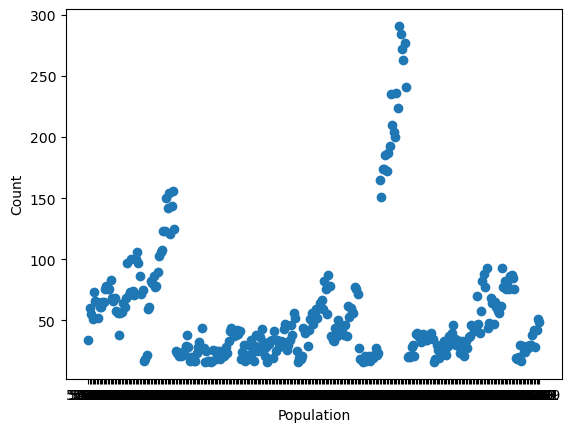

In [7]:

from pathlib import Path
from sklearn.linear_model import LinearRegression

plt.scatter(df_native_clean.Population, df_native_clean.Count)
#plt.xticks([0, 50000, 150000, 250000, 350000, 550000, 750000, 950000])
plt.xlabel('Population')
plt.ylabel('Count')
plt.show()

In [8]:
df_native_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 85 to 3870
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Race        326 non-null    object 
 1   Count       326 non-null    float64
 2   Population  326 non-null    object 
dtypes: float64(1), object(2)
memory usage: 10.2+ KB


In [9]:
df_native_clean['Population'] = df_native_clean['Population'].astype(float)

In [11]:
df_native_clean.dtypes

Race           object
Count         float64
Population    float64
dtype: object

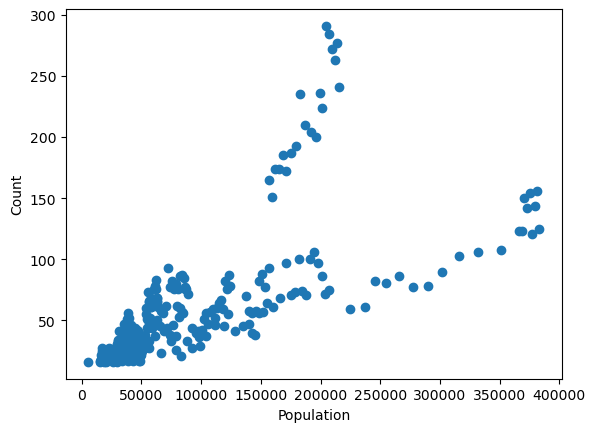

In [12]:
plt.scatter(df_native_clean.Population, df_native_clean.Count)
#plt.xticks([0, 50000, 150000, 250000, 350000, 550000, 750000, 950000])
plt.xlabel('Population')
plt.ylabel('Count')
plt.show()

In [13]:
X = df_native_clean.Population.values.reshape(-1, 1)

In [14]:
X.shape

(326, 1)

In [15]:
y = df_native_clean.Count

In [16]:
model = LinearRegression()

In [17]:
model.fit(X, y)

LinearRegression()

In [19]:
y_pred = model.predict(X)
print(y_pred.shape)

(326,)


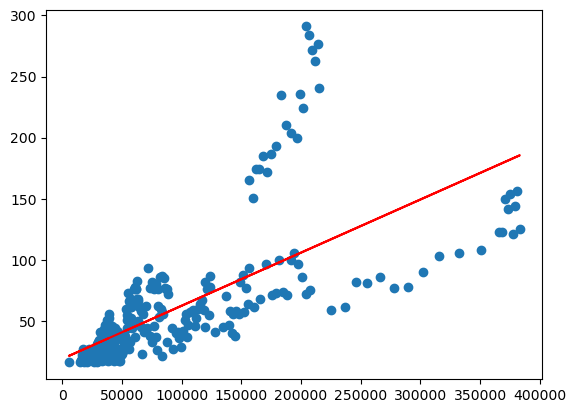

In [20]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [21]:
print(model.coef_)
print(model.intercept_)

[0.00043482]
18.946698258743794
